# SVM

Vamos a trabajar con el Wisconsin Dataset para intentar predecir los diagnósticos usando SVM. Más información acerca del dataset en https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Paso 0:
1. Importar el Dataset.
1. Chekear los valores nulos o faltantes.
1. Explorarlo e interpretar sus features.

1. Importamos el dataset

In [7]:
data = pd.read_csv("breast.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

2. Tiramos columnas que no aportan información para el análisis

In [9]:
data.drop(columns = ["Unnamed: 32", "id"],inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


3. Nos fijamos cuántos casos hay

/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


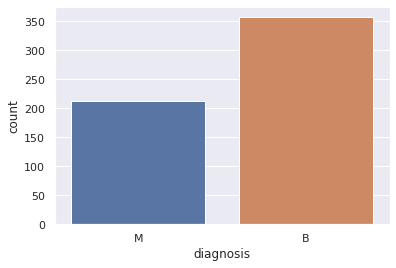

In [10]:
sns.countplot(data['diagnosis'],label="Count")
plt.show()

Y el nombre de las columnas

In [11]:
print(data.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


4. Seleccionamos solo aquellas columnas con atributos *_mean*

In [12]:
features_mean = list(data.columns[1:11])
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

Y hacemos el pairplot

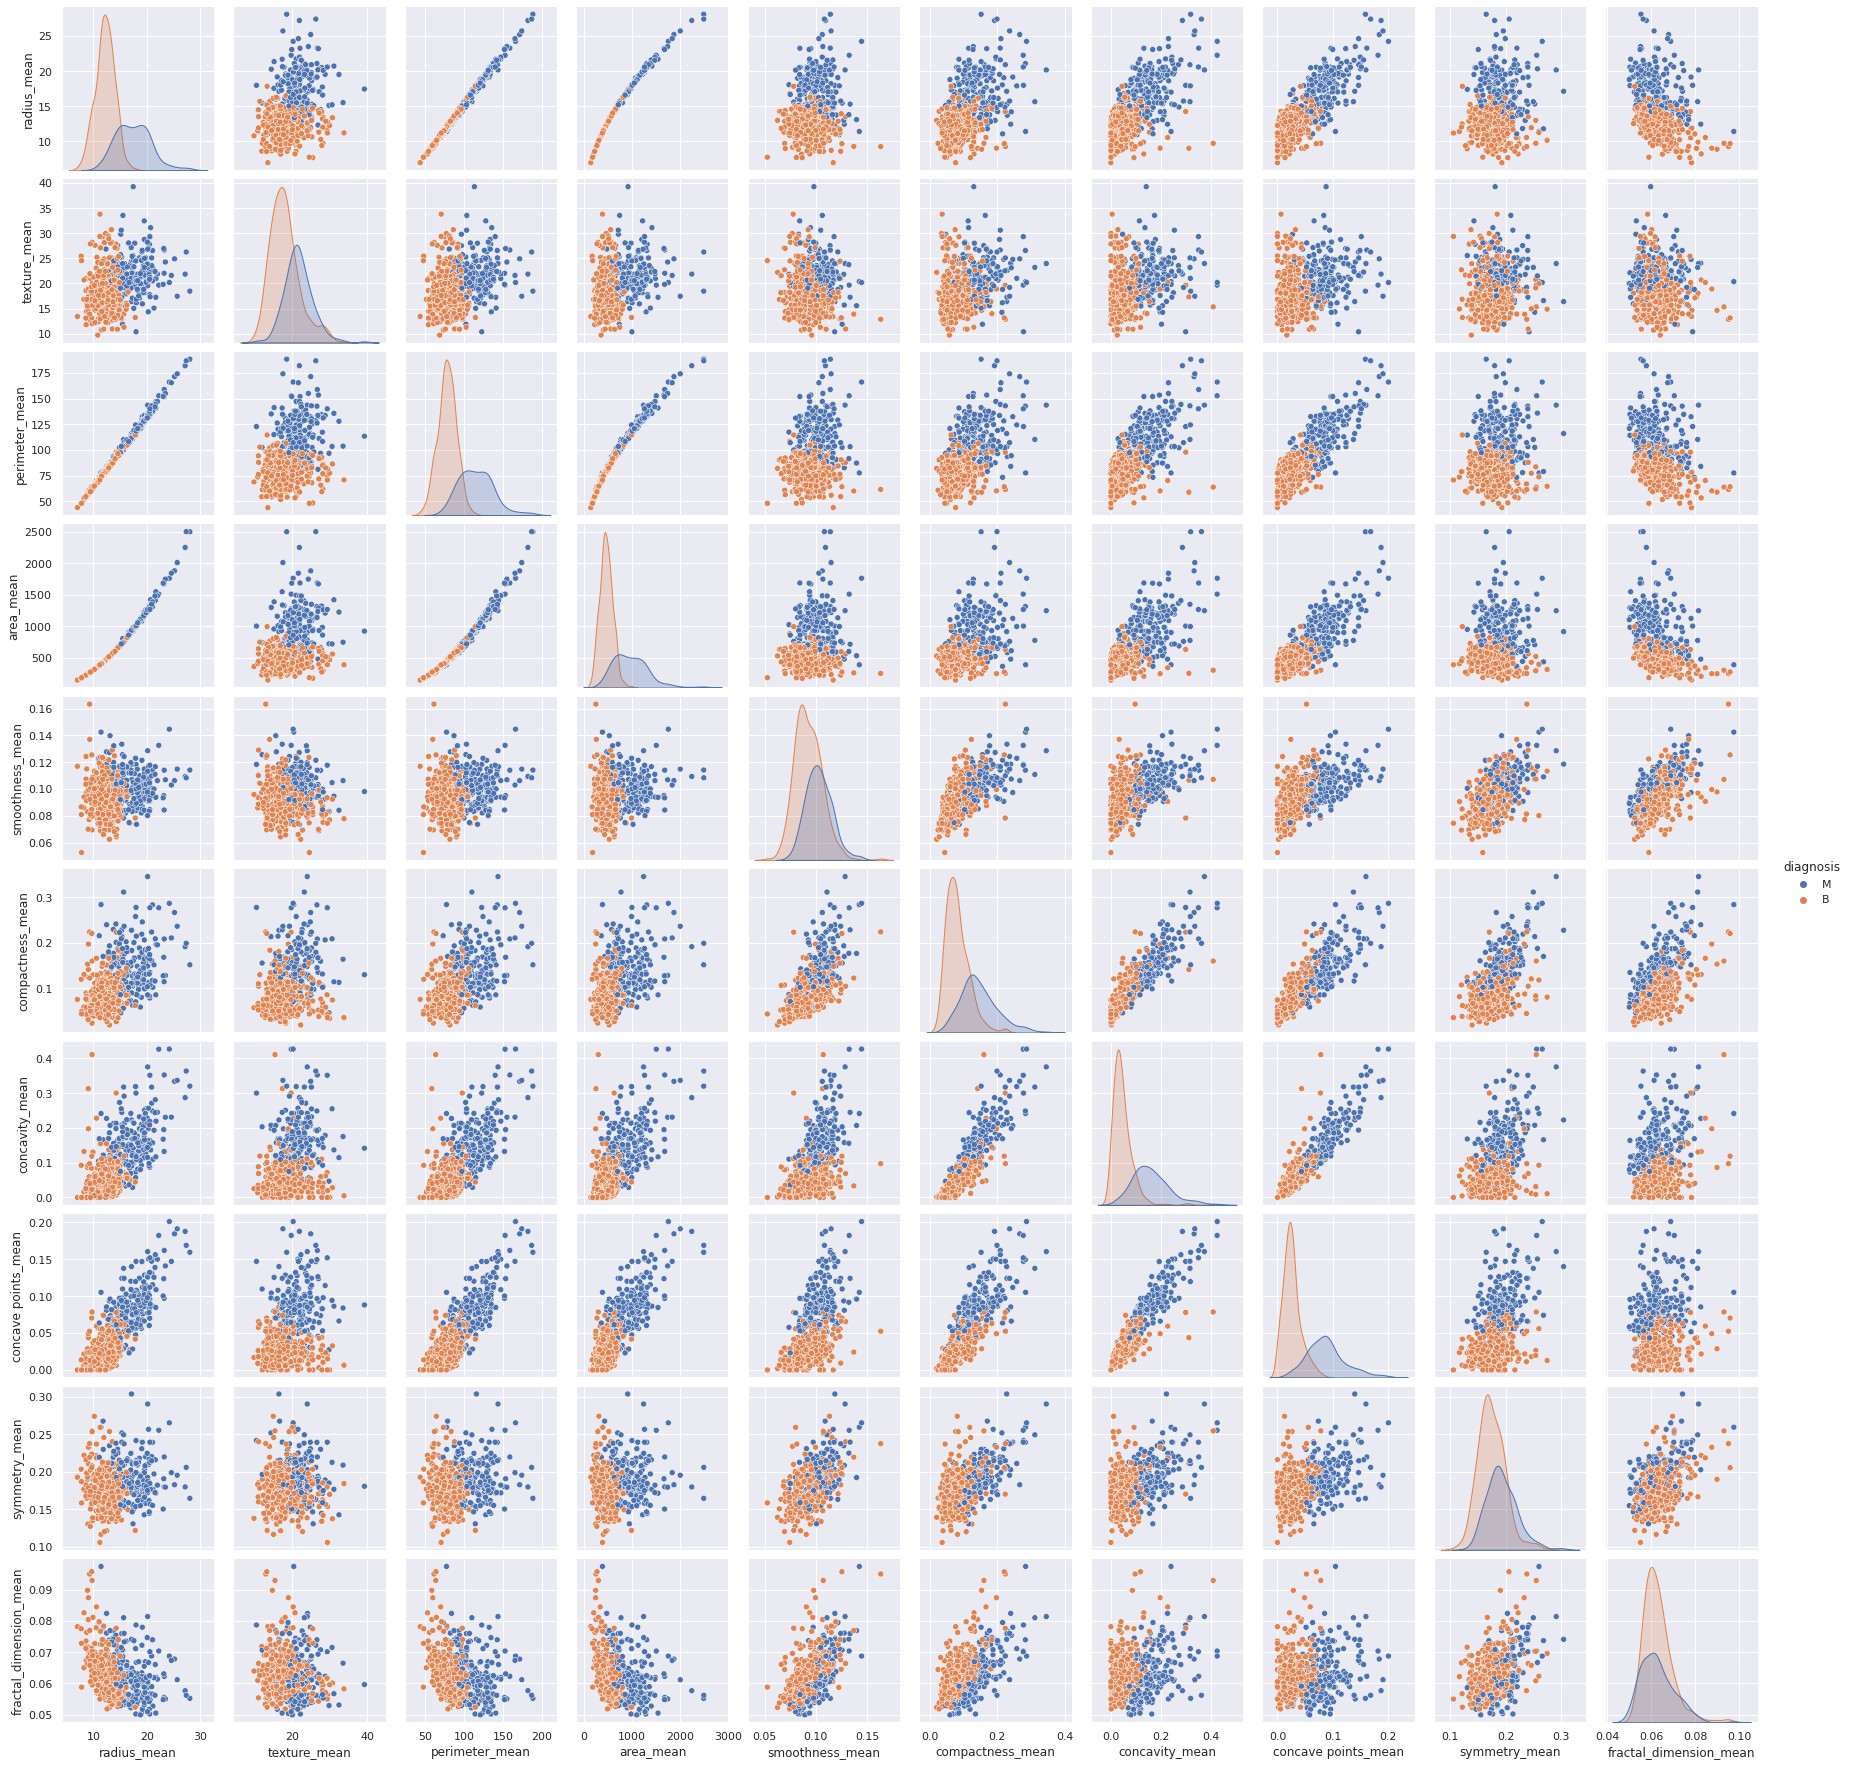

In [13]:
sns.pairplot(data[['diagnosis'] + features_mean], hue = 'diagnosis')

¿Hay features correlacionados? En el siguiente notebook exploraremos un poco más esto.


## Paso 1.

1. Elegir con qué features (dentro de las que son _mean) van a predecir. Para empezar, elegir sólo dos.
1. Separar los X de las etiquetas y.
1. Transformar a número las etiquetas.
1. Separar el conjunto de Held-Out.
1. Realizar un autoescaling.

1. Elegimos features

In [14]:
prediction_var = ['radius_mean','smoothness_mean']

2. y 3. Separamos X e y. Transformamos etiquetas.

In [15]:
X = data[prediction_var]
y = data['diagnosis'].map({'M': 1, 'B': 0})

4. Conjunto de held-out.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 43)

5. Reescaleo de los datos

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Comprobamos que haya escaleado bien

In [18]:
print(X_train.mean(axis = 0))
print(X_train.std(axis = 0))

[ 2.90108529e-17 -1.16043412e-16]
[1. 1.]


# Paso 2.
Vamos a realizar un grid-search con cross validation para optimizar los parámetros del SVM. Para eso, completá la siguiente celda:


In [19]:
from sklearn.svm import SVC

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv = 5, n_jobs = -1, iid = True, scoring='accuracy', return_train_score=True) ### completar
clf.fit(X_train, y_train)

/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(), iid=True, n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf')},
             return_train_score=True, scoring='accuracy')

Recuperamos la información del CV

In [20]:
scores = clf.cv_results_
scores = pd.DataFrame(scores)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002899,0.000389,0.001118,0.000233,1,0.0001,linear,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",0.8750,0.8875,...,0.874372,0.020639,20,0.877358,0.877358,0.883648,0.887147,0.896552,0.884413,0.007141
1,0.005424,0.001555,0.001858,0.000493,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.6125,0.6125,...,0.610553,0.002400,56,0.610063,0.610063,0.610063,0.611285,0.611285,0.610552,0.000599
2,0.002569,0.000201,0.001166,0.000318,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.8750,0.8875,...,0.874372,0.020639,20,0.877358,0.877358,0.883648,0.887147,0.896552,0.884413,0.007141
3,0.004579,0.001118,0.001435,0.000312,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.6500,0.6625,...,0.645729,0.012107,54,0.641509,0.644654,0.654088,0.645768,0.642633,0.645731,0.004437
4,0.002247,0.000228,0.000920,0.000112,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.8750,0.8875,...,0.874372,0.020639,20,0.877358,0.877358,0.883648,0.887147,0.896552,0.884413,0.007141


Y buscamos el mejor modelo

In [21]:
param = clf.best_params_
print(param)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


# Paso 3.
1. Para cada kernel, realizá la curva de complejidad para la opción de gamma que eligiió el gridsearch (ploteá score en función de C)
1. ¿Qué podés intepretar de esta curva? 

1. Empezamos separando los datos con kernel lineal. ¿Influye gamma?

In [22]:
mascara = scores.param_kernel == 'linear'
score_kernel_lineal = scores[mascara]
score_kernel_lineal.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002899,0.000389,0.001118,0.000233,1,0.0001,linear,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",0.875,0.8875,...,0.874372,0.020639,20,0.877358,0.877358,0.883648,0.887147,0.896552,0.884413,0.007141
2,0.002569,0.000201,0.001166,0.000318,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.875,0.8875,...,0.874372,0.020639,20,0.877358,0.877358,0.883648,0.887147,0.896552,0.884413,0.007141
4,0.002247,0.000228,0.000920,0.000112,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.875,0.8875,...,0.874372,0.020639,20,0.877358,0.877358,0.883648,0.887147,0.896552,0.884413,0.007141
6,0.002409,0.000533,0.000852,0.000079,1,0.1,linear,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.875,0.8875,...,0.874372,0.020639,20,0.877358,0.877358,0.883648,0.887147,0.896552,0.884413,0.007141
8,0.004748,0.004740,0.000927,0.000122,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.875,0.8875,...,0.874372,0.020639,20,0.877358,0.877358,0.883648,0.887147,0.896552,0.884413,0.007141


In [23]:
score_kernel_lineal.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [24]:
x = score_kernel_lineal.param_C
y = score_kernel_lineal.mean_test_score
y_err = score_kernel_lineal.std_train_score

Y separamos los datos con kernel 'rbf' y el mejor gamma.

In [25]:
mascara = (scores.param_kernel == 'rbf') & (scores.param_gamma == param['gamma'])
score_kernel_rbf = scores[mascara]
score_kernel_rbf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
7,0.004673,0.003185,0.001169,0.000300,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.875,0.8750,...,0.871859,0.023999,35,0.864780,0.867925,0.880503,0.877743,0.884013,0.874993,0.007397
21,0.007113,0.003881,0.001183,0.000150,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.875,0.9125,...,0.876884,0.026718,1,0.874214,0.883648,0.893082,0.887147,0.890282,0.885675,0.006538
35,0.010317,0.003857,0.001069,0.000071,100,0.1,rbf,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.875,0.8750,...,0.864322,0.019735,37,0.880503,0.883648,0.877358,0.890282,0.902821,0.886923,0.009027
49,0.010092,0.001402,0.000895,0.000090,1000,0.1,rbf,"{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}",0.875,0.8750,...,0.861809,0.015899,41,0.877358,0.877358,0.880503,0.890282,0.896552,0.884411,0.007702


Separamos los datos para plotear. Recordamos cuales son las columnas

In [26]:
score_kernel_lineal.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [27]:
x_lineal = score_kernel_lineal.param_C
y_lineal = score_kernel_lineal.mean_test_score
y_err_lineal = score_kernel_lineal.std_train_score

x_rbf = score_kernel_rbf.param_C
y_rbf = score_kernel_rbf.mean_test_score
y_err_rbf = score_kernel_rbf.std_train_score

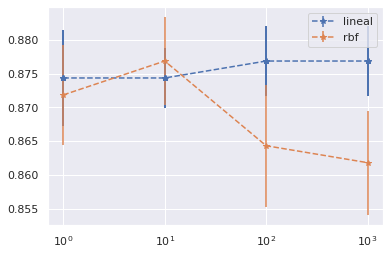

In [28]:
plt.errorbar(x_lineal,y_lineal,y_err_lineal, marker = '*', linestyle = '--', label  = 'lineal')
plt.errorbar(x_rbf,y_rbf,y_err_rbf, marker = '*', linestyle = '--', label  = 'rbf')
plt.legend()
plt.xscale('log')
plt.show()

Veamos qué estamos queriendo separar y cómo:

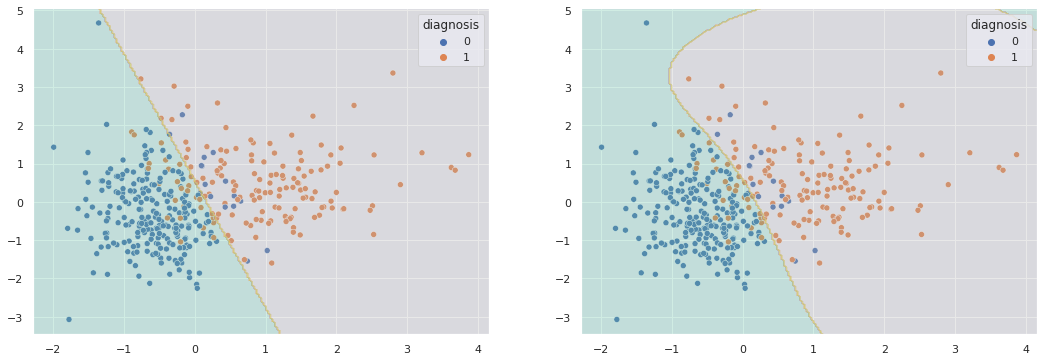

In [29]:
clf_lineal = SVC(kernel='linear', C = 1)
clf_rbf = SVC(kernel='rbf', C = param['C'], gamma = param['gamma'])

clf_lineal.fit(X_train,y_train)
clf_rbf.fit(X_train,y_train)

plt.figure(figsize = (18,6))

#Grafico Clasificador lineal
plt.subplot(1,2,1)
ax = sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue = y_train)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf_lineal.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')

#Grafico Clasificador rbf
plt.subplot(1,2,2)
ax = sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue = y_train)
Z = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')

plt.show()

# Paso 4.
1. Elegí el mejor modelo que eligió el Gridsearch. ¿Estás contenta con esta elección?
1. Reportá el score sobre el Held-out, y su matriz de confusión y reflexioná:


In [30]:
y_test_pred = clf_lineal.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.9532163742690059


In [31]:
confusion_matrix(y_test, y_test_pred)

array([[110,   4],
       [  4,  53]])

In [32]:
y_test_pred = clf_rbf.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.9590643274853801


In [33]:
confusion_matrix(y_test, y_test_pred)

array([[111,   3],
       [  4,  53]])